In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import livelossplot

In [2]:
df = pd.read_csv("HR Employee Attrition.csv", na_values='?')

In [3]:
df.shape

(1470, 35)

In [4]:
df = df.dropna()

In [5]:
df.shape

(1470, 35)

In [6]:
lb = LabelEncoder()
df['EducationField'] = lb.fit_transform(df['EducationField'])
df['BusinessTravel'] = lb.fit_transform(df['BusinessTravel'])
df['Attrition'] = lb.fit_transform(df['Attrition'])
df['Department'] = lb.fit_transform(df['Department'])
df['Gender'] = lb.fit_transform(df['Gender'])
df['JobRole'] = lb.fit_transform(df['JobRole'])
df['MaritalStatus'] = lb.fit_transform(df['MaritalStatus'])
df['OverTime'] = lb.fit_transform(df['OverTime'])
df['Over18'] = lb.fit_transform(df['Over18'])

In [7]:
d = df.drop(['Attrition'], axis=1)

In [8]:
d.shape

(1470, 34)

In [9]:
scaler = StandardScaler()
s_df = scaler.fit_transform(df.drop('Attrition', axis=1))
X = s_df
Y = df['Attrition']

In [10]:
Y = to_categorical(Y)
Y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1029, 34) (441, 34) (1029, 2) (441, 2)


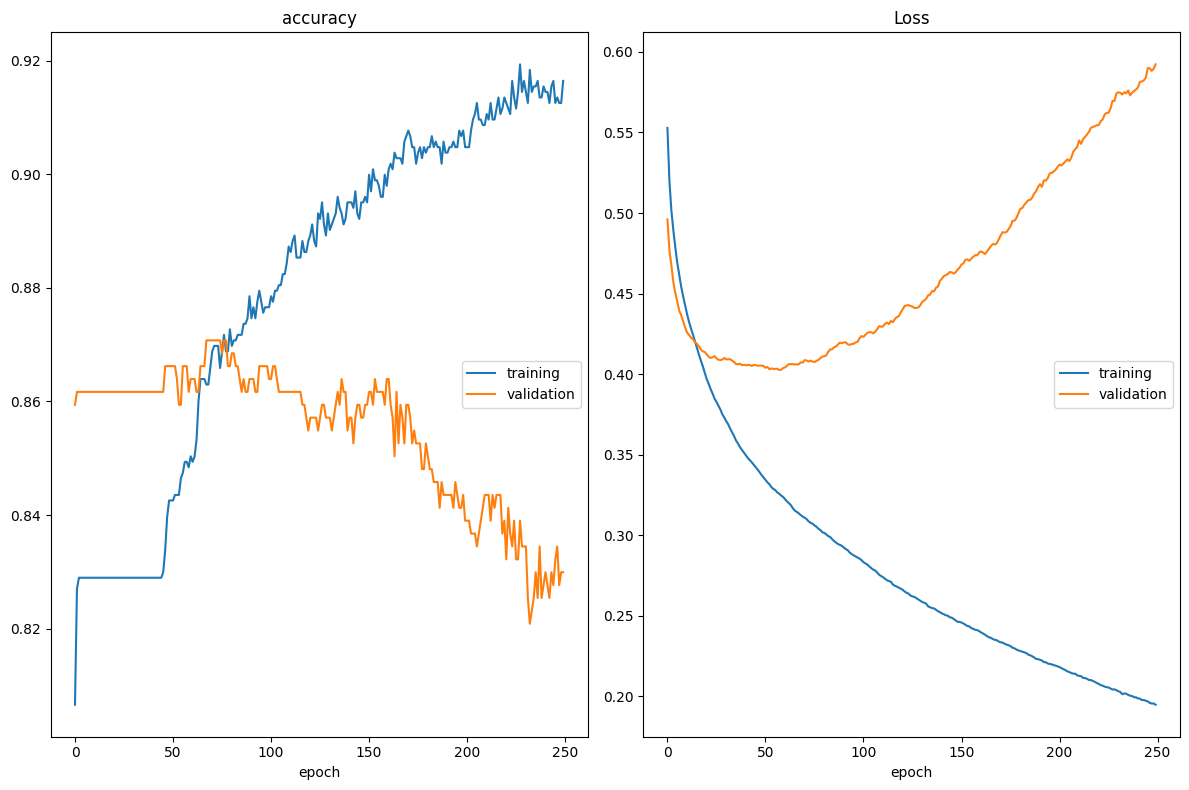

accuracy
	training         	 (min:    0.807, max:    0.919, cur:    0.916)
	validation       	 (min:    0.821, max:    0.871, cur:    0.830)
Loss
	training         	 (min:    0.195, max:    0.553, cur:    0.195)
	validation       	 (min:    0.403, max:    0.592, cur:    0.592)
9/9 [==============================] - 1s 100ms/step - loss: 0.1946 - accuracy: 0.9164 - val_loss: 0.5923 - val_accuracy: 0.8299
Test Loss Score: 0.5923210978507996
Test Accuracy Score: 0.8299319744110107


In [64]:
# Building a three-layer feedforward neural network

model1 = Sequential()
model1.add(Dense(input_dim =34,units = 8, activation='relu'))  
model1.add(Dense(units=16, activation='relu'))
model1.add(Dense(units=2, activation='softmax'))

# Compiling model1

model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Live training loss plot

PlotLosses1 = livelossplot.PlotLossesKeras()                       

# Training model1

model1.fit(X_train, y_train, batch_size = 128, epochs = 250, callbacks=[PlotLosses1], verbose=1, validation_data=(X_test, y_test))

score = model1.evaluate(X_test, y_test, verbose=0)

# Display both loss and accuracy

print("Test Loss Score:", score[0])
print("Test Accuracy Score:", score[1])

In [65]:
model1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 8)                 280       
                                                                 
 dense_35 (Dense)            (None, 16)                144       
                                                                 
 dense_36 (Dense)            (None, 2)                 34        
                                                                 
Total params: 458
Trainable params: 458
Non-trainable params: 0
_________________________________________________________________


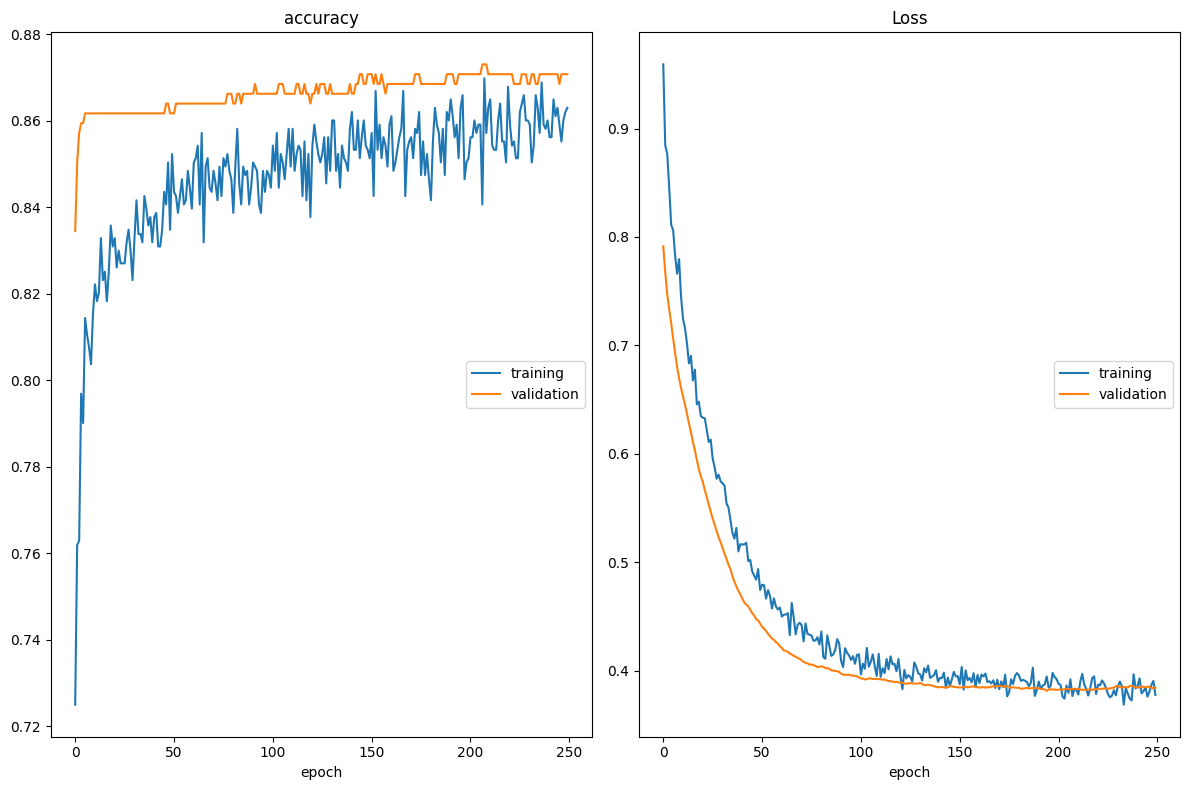

accuracy
	training         	 (min:    0.725, max:    0.870, cur:    0.863)
	validation       	 (min:    0.834, max:    0.873, cur:    0.871)
Loss
	training         	 (min:    0.369, max:    0.959, cur:    0.378)
	validation       	 (min:    0.381, max:    0.791, cur:    0.384)
9/9 [==============================] - 1s 97ms/step - loss: 0.3775 - accuracy: 0.8630 - val_loss: 0.3843 - val_accuracy: 0.8707
Test Loss Score: 0.3842889964580536
Test Accuracy Score: 0.8707482814788818


In [14]:
# Building a three-layer feedforward neural network with l2 regularization and dropout

model2 = Sequential()
model2.add(Dense(units = 8, activation = 'relu', input_dim = 34, kernel_regularizer = 'l2'))                  
model2.add(Dropout(0.5))
model2.add(Dense(units = 16, activation = 'relu', kernel_regularizer = 'l2'))
model2.add(Dropout(0.25))
model2.add(Dense(units = 2, activation = 'softmax', kernel_regularizer = 'l2'))

# Compiling the model2

model2.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

PlotLosses2 = livelossplot.PlotLossesKeras()

# Training the model2

model2.fit(X_train, y_train, batch_size = 128, epochs = 250, callbacks=[PlotLosses2], verbose = 1, validation_data = (X_test, y_test))

score = model2.evaluate(X_test, y_test, verbose = 0)

# Display both loss and accuracy

print('Test Loss Score:', score[0])
print('Test Accuracy Score:', score[1])

In [15]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 280       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 458
Trainable params: 458
Non-trainable params: 0
_________________________________________________________________


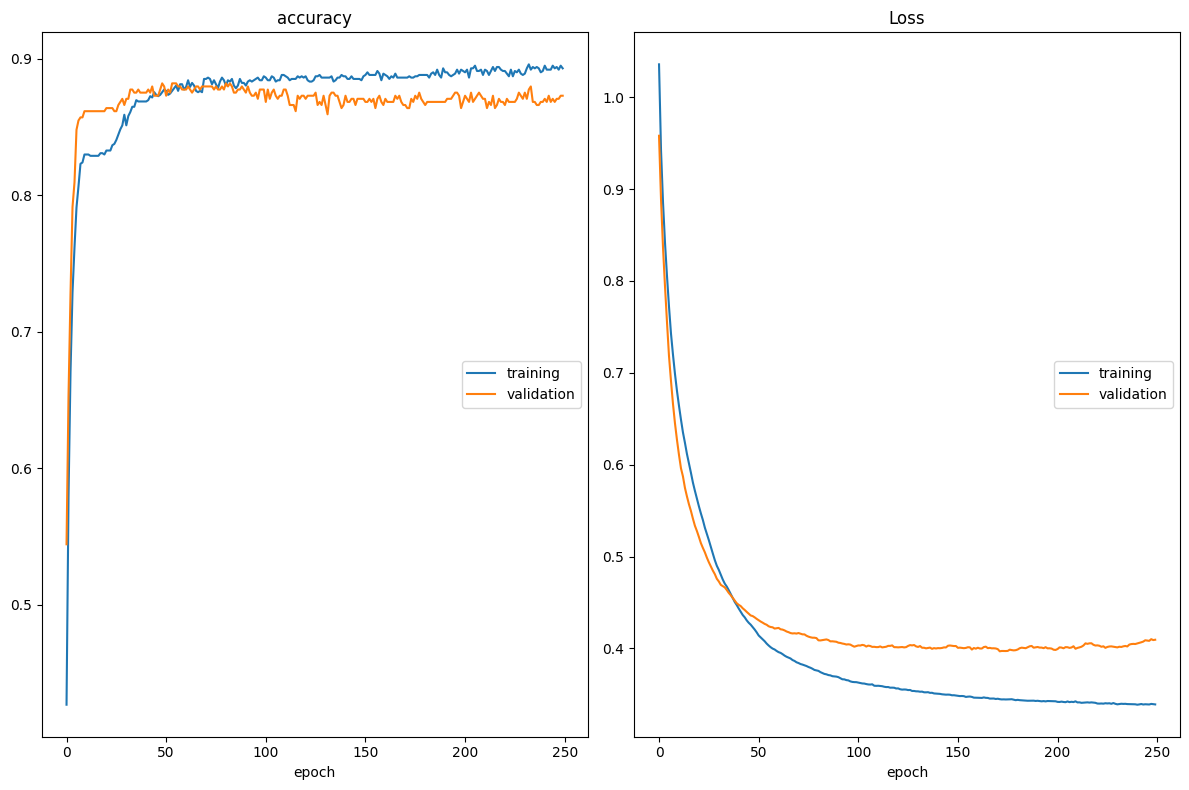

accuracy
	training         	 (min:    0.427, max:    0.896, cur:    0.893)
	validation       	 (min:    0.544, max:    0.882, cur:    0.873)
Loss
	training         	 (min:    0.339, max:    1.036, cur:    0.339)
	validation       	 (min:    0.397, max:    0.958, cur:    0.409)
9/9 [==============================] - 1s 90ms/step - loss: 0.3390 - accuracy: 0.8931 - val_loss: 0.4094 - val_accuracy: 0.8730
Test Loss Score: 0.4093739688396454
Test Accuracy Score: 0.8730158805847168


In [16]:
# Building a three-layer feedforward neural network with l2 regularization and without dropout

model3 = Sequential()
model3.add(Dense( activation = 'relu', units = 8, input_dim = 34, kernel_regularizer = 'l2'))                 
model3.add(Dense( activation = 'relu', units = 16, kernel_regularizer = 'l2'))
model3.add(Dense( activation = 'softmax', units = 2, kernel_regularizer = 'l2'))

# Compiling model2

model3.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Live training loss plot

PlotLosses3 = livelossplot.PlotLossesKeras()

# Training the model2

model3.fit(X_train, y_train, batch_size = 128, epochs = 250, callbacks = [PlotLosses3], verbose = 1, validation_data = (X_test, y_test))

score = model3.evaluate(X_test, y_test, verbose = 0)

# Display both loss and accuracy

print('Test Loss Score:', score[0])
print('Test Accuracy Score:', score[1])

In [17]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 280       
                                                                 
 dense_7 (Dense)             (None, 16)                144       
                                                                 
 dense_8 (Dense)             (None, 2)                 34        
                                                                 
Total params: 458
Trainable params: 458
Non-trainable params: 0
_________________________________________________________________
